In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the main dataset and CATE predictions
data = pd.read_csv('../../data/analysis_data/dataset.csv')
s_predictions = pd.read_csv('../../results/analysis_data_results/entire_data/s_predictions.csv')
t_predictions = pd.read_csv('../../results/analysis_data_results/entire_data/t_predictions.csv')
x_predictions = pd.read_csv('../../results/analysis_data_results/entire_data/x_predictions.csv')
r_predictions = pd.read_csv('../../results/analysis_data_results/entire_data/r_predictions.csv')


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths for predictions
file_paths = {
    's_CATE': '../../results/analysis_data_results/entire_data/s_predictions.csv',
    't_CATE': '../../results/analysis_data_results/entire_data/t_predictions.csv',
    'x_CATE': '../../results/analysis_data_results/entire_data/x_predictions.csv',
    'r_CATE': '../../results/analysis_data_results/entire_data/r_predictions.csv'
}

# Load predictions from all meta-learners
meta_learner_dfs = []
for learner, path in file_paths.items():
    df = pd.read_csv(path)
    df['MetaLearner'] = learner
    meta_learner_dfs.append(df)

# Combine all meta-learner predictions into one DataFrame
combined_data = pd.concat(meta_learner_dfs, ignore_index=True)

# Columns to group by for visualization
categorical_columns = ['schoolid', 'StudentRaceEthnicity', 'StudentGender', 'FirstGenCollegeStatus', 'SchoolUrbanicity']
continuous_columns = ['PreInterventionFixedMindset', 'SchoolAchievementLevel', 'SchoolMinorityComposition',
                      'PovertyConcentration', 'TotalStudentPopulation']


combined_data.head()

,PreInterventionFixedMindset,SchoolAchievementLevel,SchoolMinorityComposition,PovertyConcentration,TotalStudentPopulation,schoolid,StudentRaceEthnicity,StudentGender,FirstGenCollegeStatus,SchoolUrbanicity,s_CATE,MetaLearner,t_CATE,x_CATE,r_CATE
0,0.38672,0.634672,-1.268833,0.279138,-0.39649,6.0,4.0,2.0,1.0,4.0,-0.022216,s_CATE,NaN,NaN,NaN
1,0.38672,0.634672,-1.268833,0.279138,-0.39649,4.0,12.0,2.0,1.0,4.0,-0.010935,s_CATE,NaN,NaN,NaN
2,0.38672,0.634672,-1.268833,0.279138,-0.39649,6.0,4.0,2.0,0.0,4.0,-0.050204,s_CATE,NaN,NaN,NaN
3,0.38672,0.634672,-1.268833,0.279138,-0.39649,6.0,4.0,2.0,0.0,4.0,-0.050204,s_CATE,NaN,NaN,NaN
4,0.38672,0.634672,-1.268833,0.279138,-0.39649,6.0,4.0,1.0,0.0,4.0,-0.034634,s_CATE,NaN,NaN,NaN


In [29]:
def visualize_cate_by_category(data, cate_columns, category_col, meta_learners, title_prefix="CATE by Category"):
    plt.figure(figsize=(12, 8))
    # Melt the data for categorical comparison across meta-learners
    data_melted = pd.melt(data, id_vars=[category_col], value_vars=cate_columns, var_name="MetaLearner", value_name="CATE")
    sns.barplot(data=data_melted, x=category_col, y="CATE", hue="MetaLearner", ci=None)
    plt.title(f"{title_prefix}: {category_col}")
    plt.xticks(rotation=45)
    plt.xlabel(category_col)
    plt.ylabel("Average CATE")
    plt.legend(title="Meta Learners")
    plt.tight_layout()
    plt.show()


In [30]:
def visualize_cate_by_continuous(data, cate_columns, continuous_col, meta_learners, title_prefix="CATE by Continuous Variable"):
    plt.figure(figsize=(12, 8))
    for cate_col, meta_learner in zip(cate_columns, meta_learners):
        sns.lineplot(data=data, x=continuous_col, y=cate_col, label=meta_learner)
    plt.title(f"{title_prefix}: {continuous_col}")
    plt.xlabel(continuous_col)
    plt.ylabel("CATE")
    plt.legend(title="Meta Learners")
    plt.tight_layout()
    plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_600\1666983368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_melted, x=category_col, y="CATE", hue="MetaLearner", ci=None)


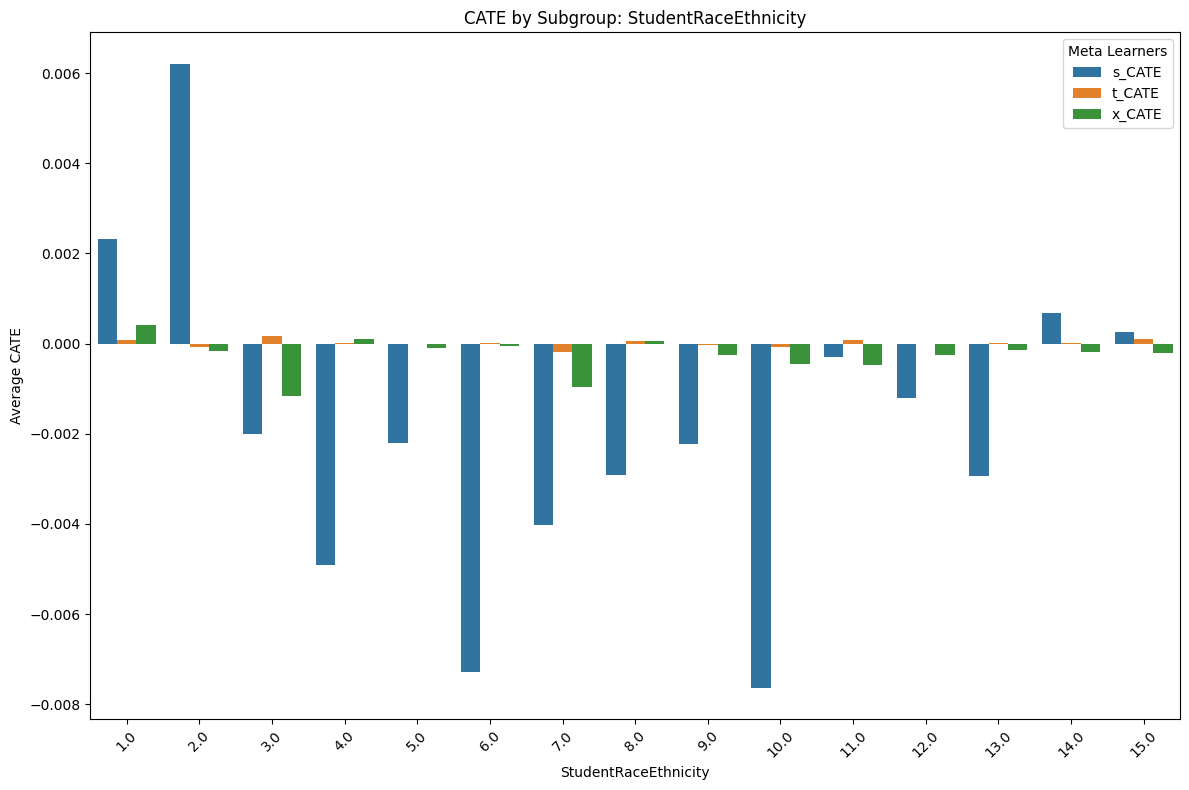

C:\Users\dell\AppData\Local\Temp\ipykernel_600\1666983368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_melted, x=category_col, y="CATE", hue="MetaLearner", ci=None)


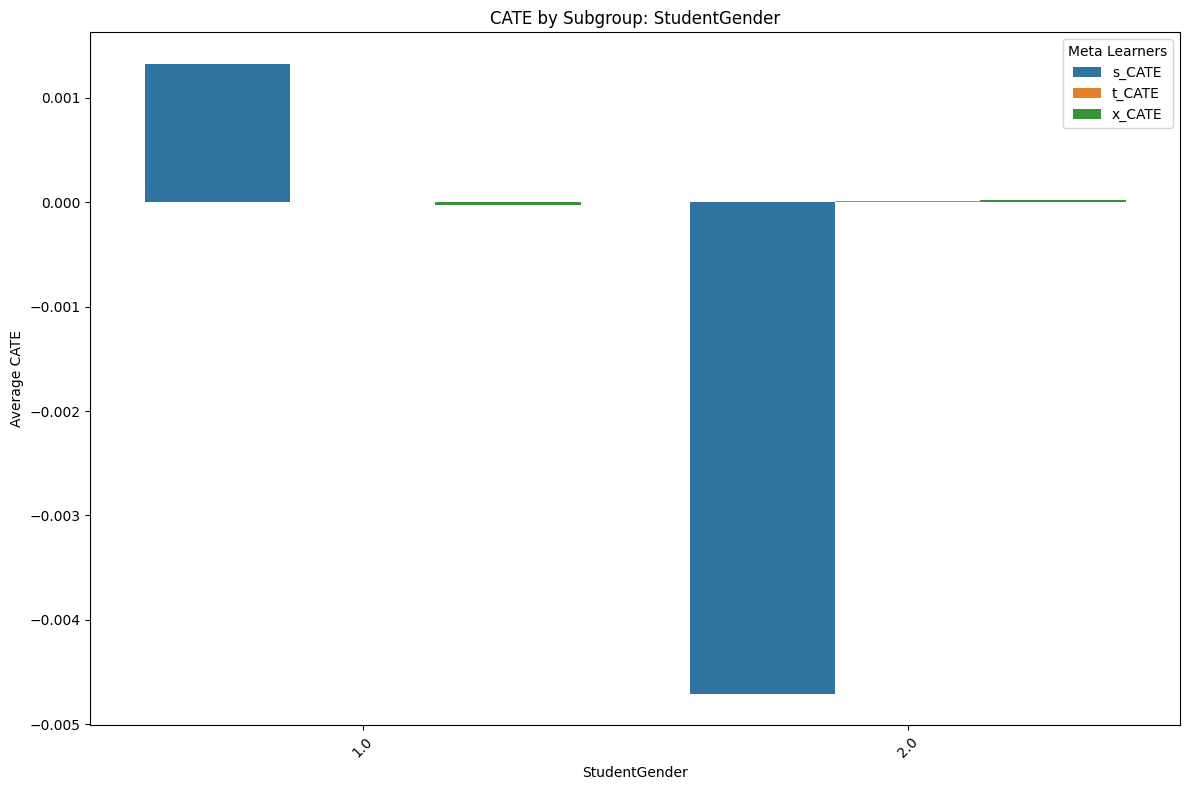

C:\Users\dell\AppData\Local\Temp\ipykernel_600\1666983368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_melted, x=category_col, y="CATE", hue="MetaLearner", ci=None)


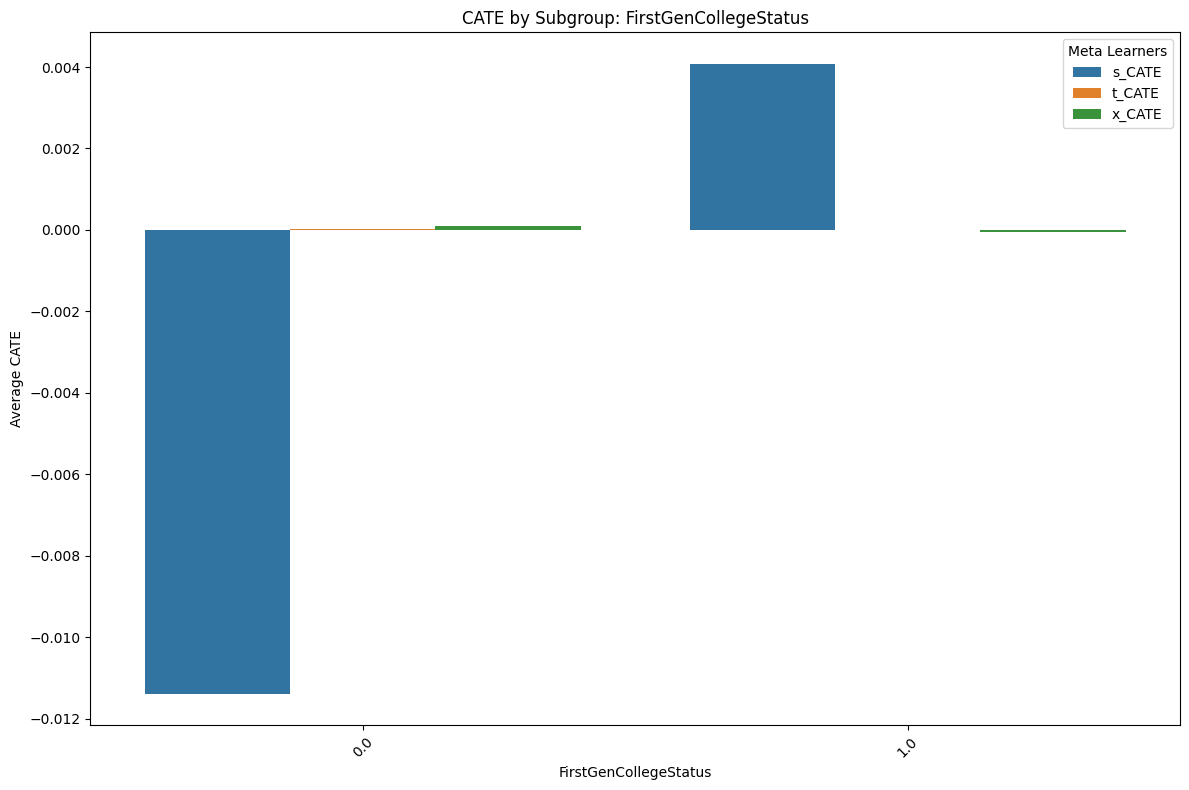

C:\Users\dell\AppData\Local\Temp\ipykernel_600\1666983368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_melted, x=category_col, y="CATE", hue="MetaLearner", ci=None)


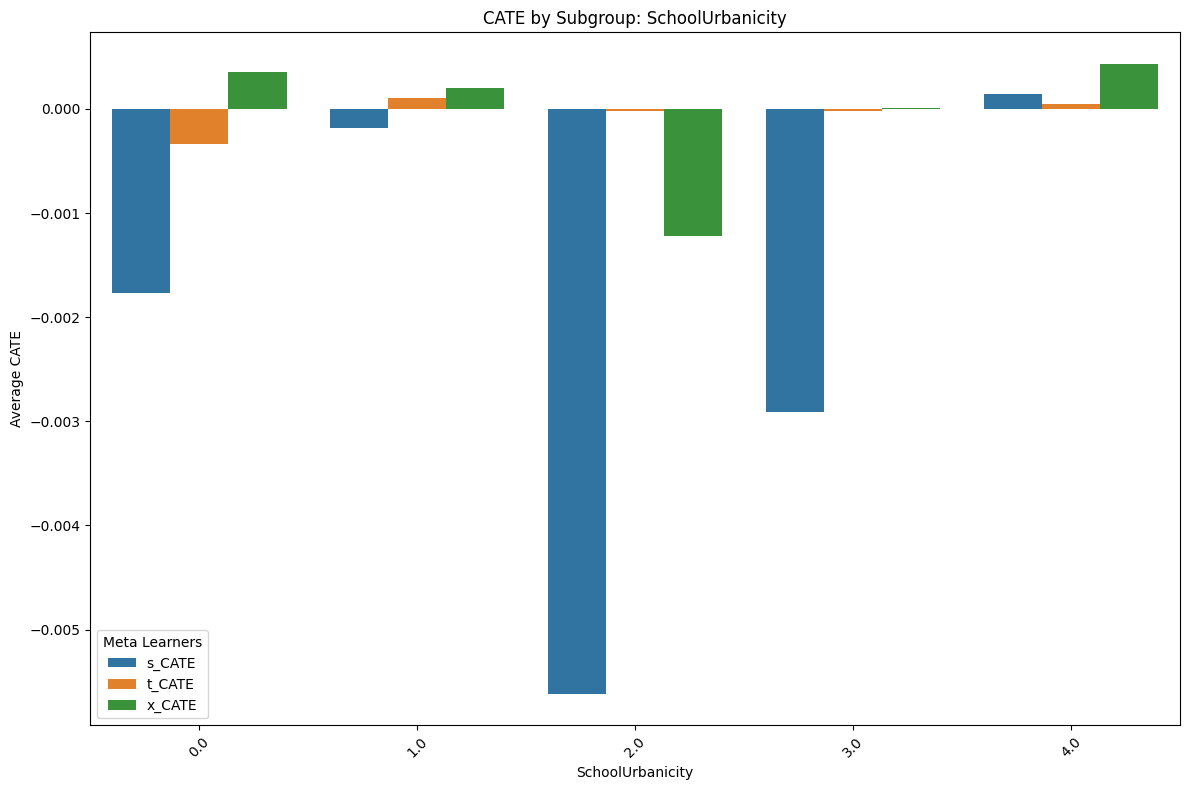

In [31]:
# List of CATE columns and corresponding meta-learners
cate_columns = ["s_CATE", "t_CATE", "x_CATE"] # "r_CATE" is excluded due to missing values
meta_learners = ["S-Learner", "T-Learner", "X-Learner"] # "R-Learner" is excluded due to missing values

# Loop over each categorical variable
categorical_cols = ['StudentRaceEthnicity', 'StudentGender', 'FirstGenCollegeStatus', 'SchoolUrbanicity']
for category_col in categorical_cols:
    visualize_cate_by_category(combined_data, cate_columns, category_col, meta_learners, title_prefix="CATE by Subgroup")


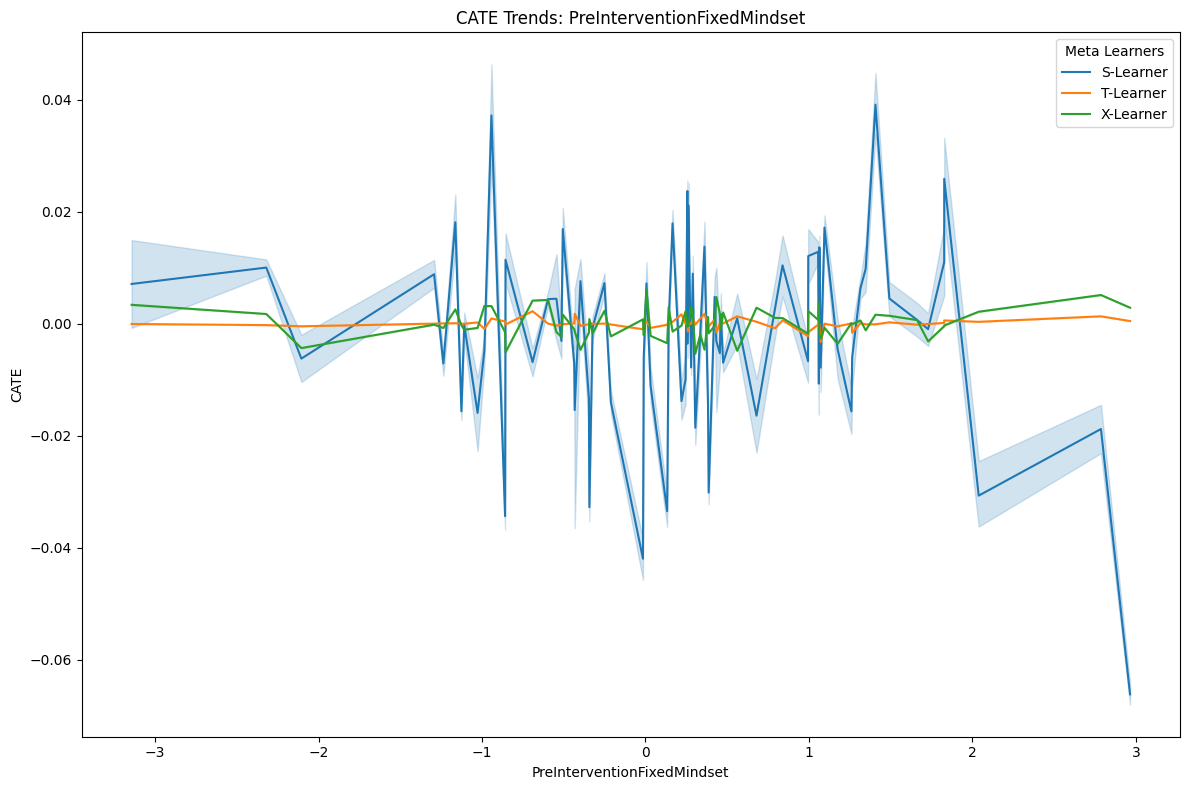

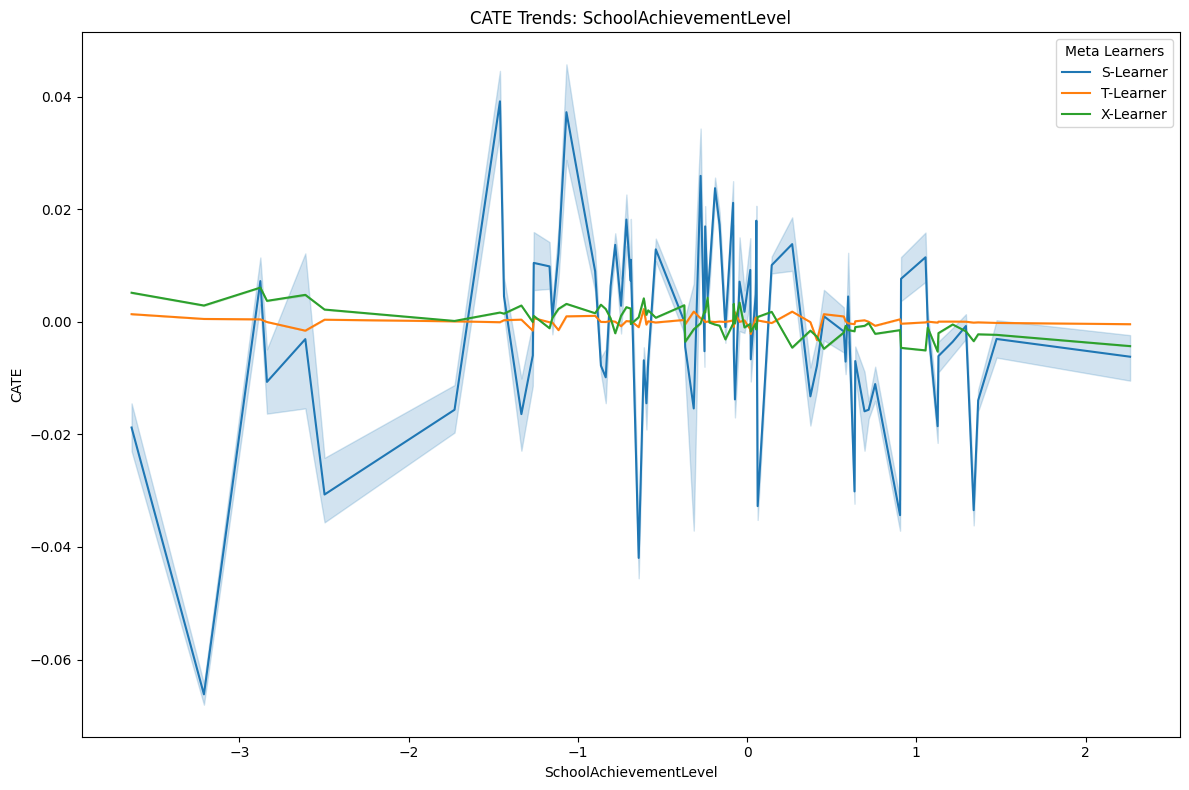

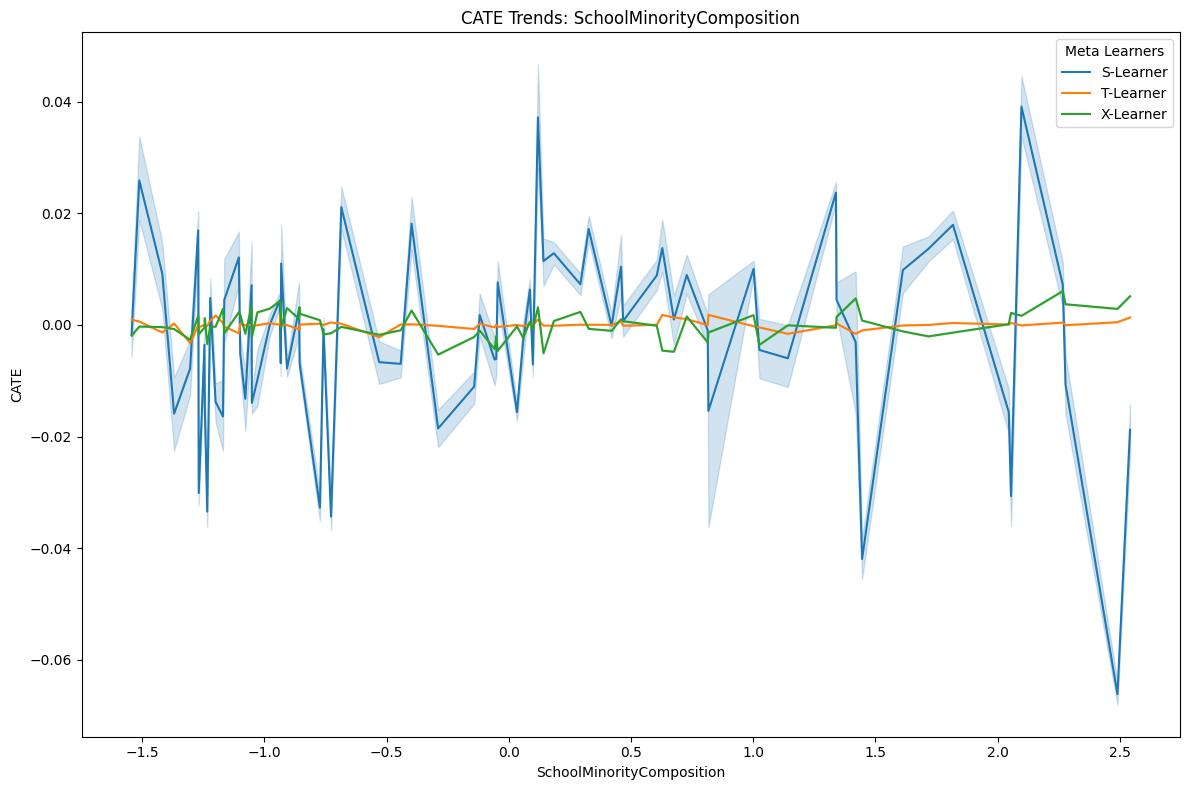

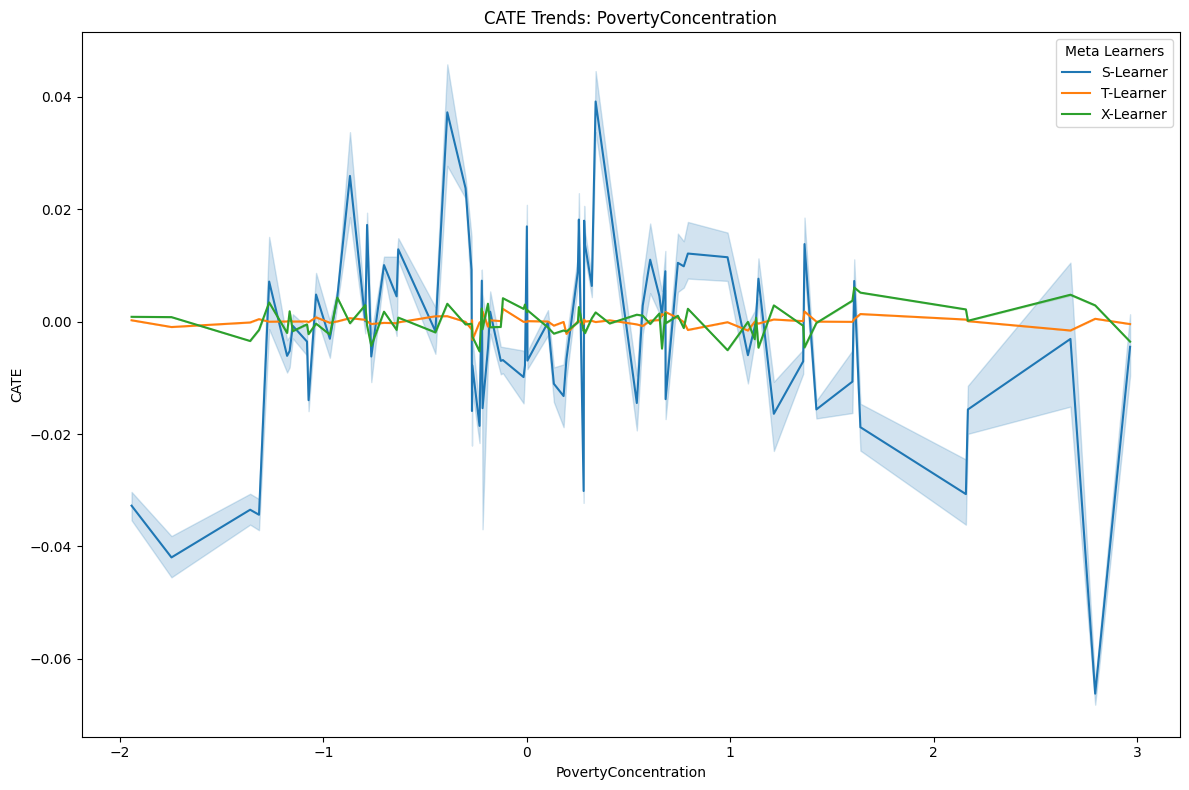

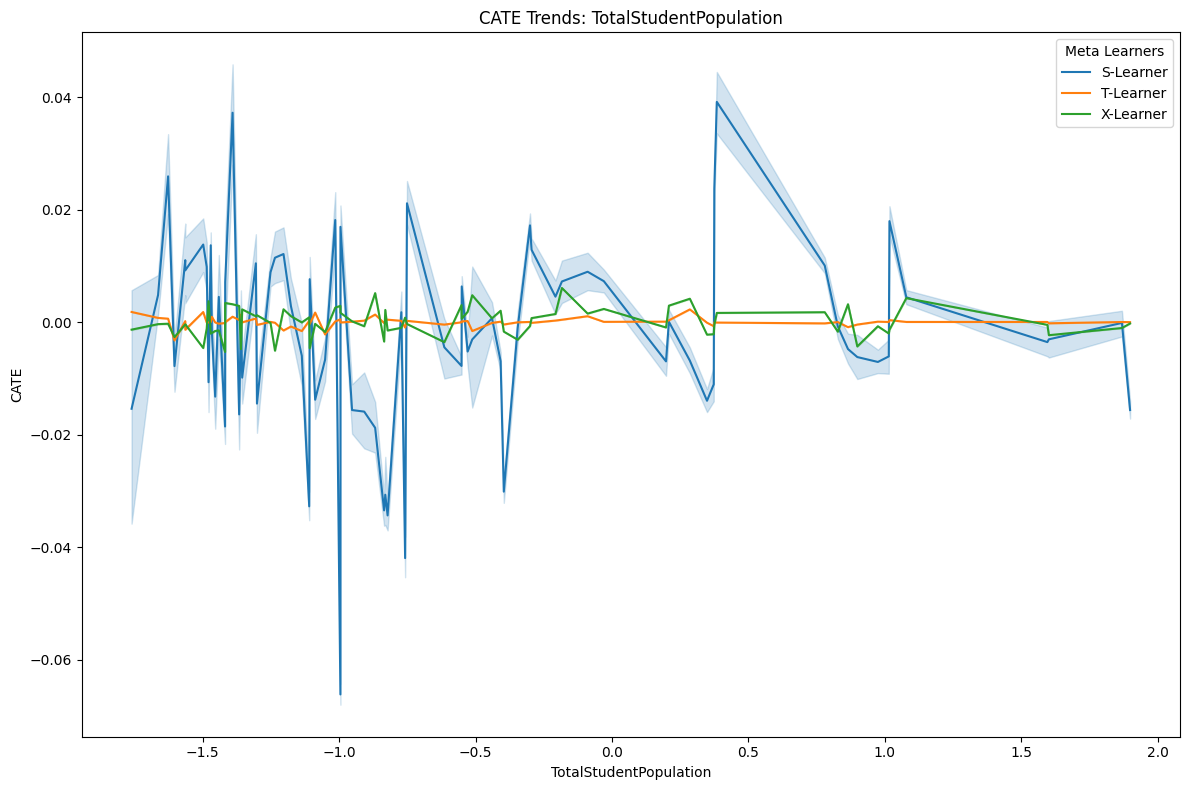

In [32]:
# Loop over each continuous variable
continuous_cols = ['PreInterventionFixedMindset', 'SchoolAchievementLevel', 'SchoolMinorityComposition', 
                   'PovertyConcentration', 'TotalStudentPopulation']
for continuous_col in continuous_cols:
    visualize_cate_by_continuous(combined_data, cate_columns, continuous_col, meta_learners, title_prefix="CATE Trends")


C:\Users\dell\AppData\Local\Temp\ipykernel_600\1666983368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_melted, x=category_col, y="CATE", hue="MetaLearner", ci=None)


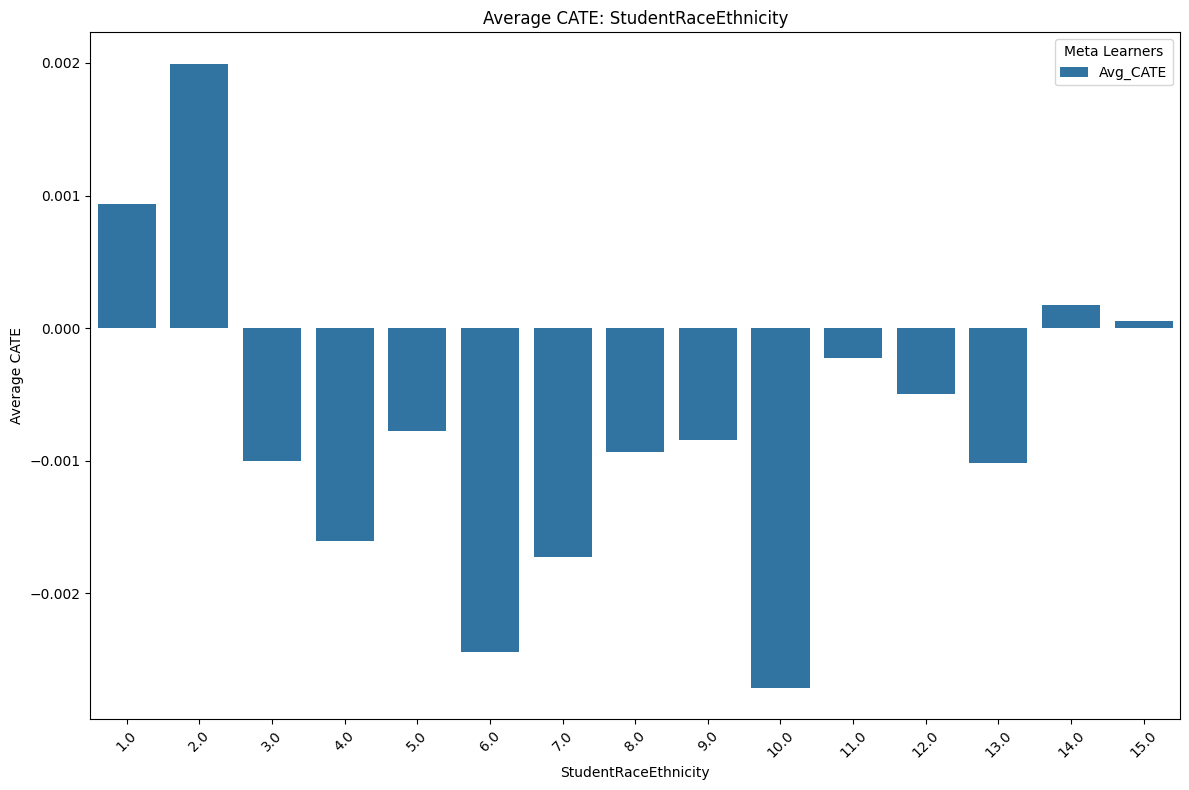

In [33]:
combined_data.groupby('StudentRaceEthnicity')[cate_columns].mean().sort_values(by='s_CATE', ascending=False)
combined_data['Avg_CATE'] = combined_data[cate_columns].mean(axis=1)
visualize_cate_by_category(combined_data, ["Avg_CATE"], "StudentRaceEthnicity", ["Average"], title_prefix="Average CATE")


C:\Users\dell\AppData\Local\Temp\ipykernel_600\1666983368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_melted, x=category_col, y="CATE", hue="MetaLearner", ci=None)


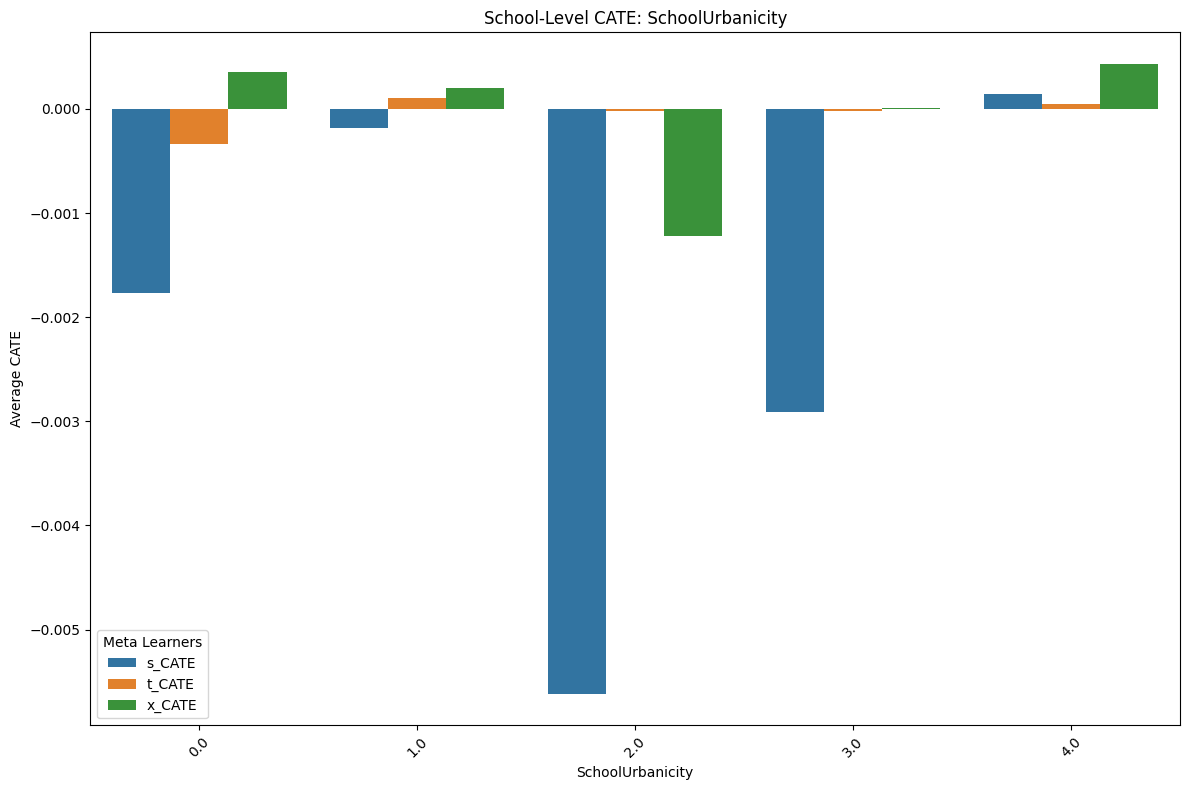

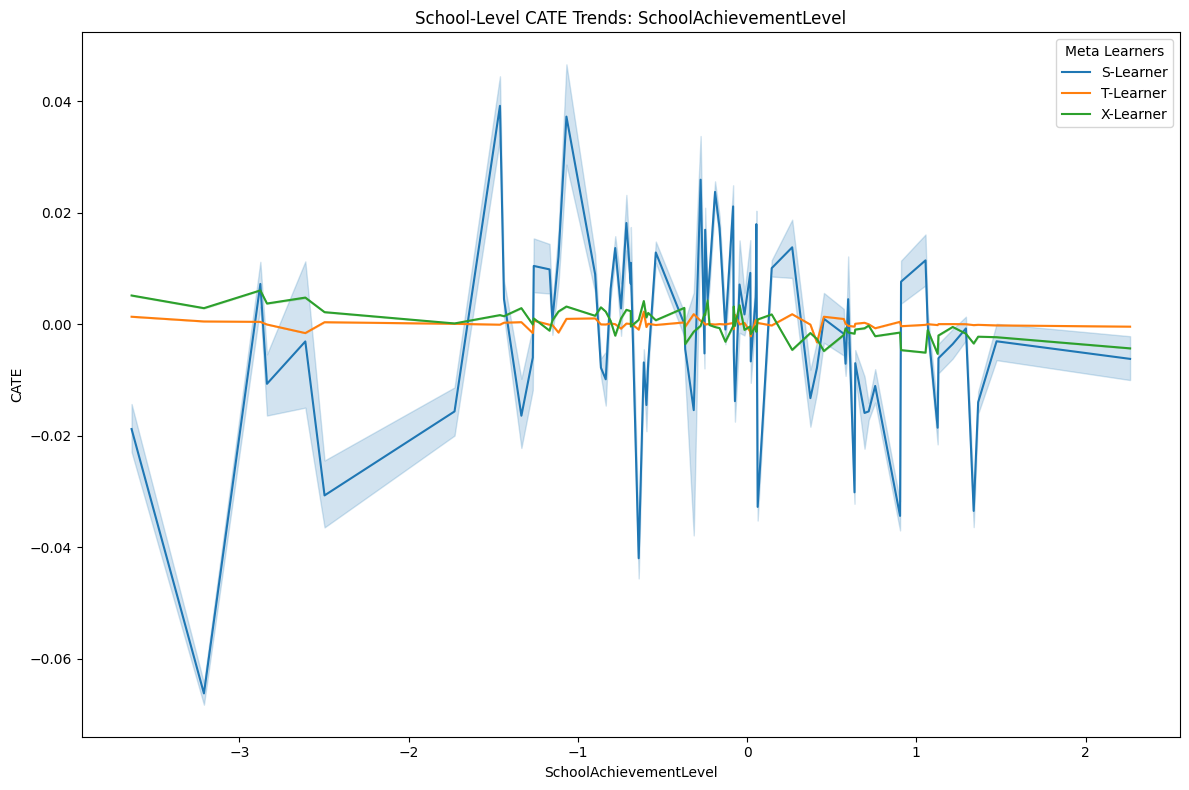

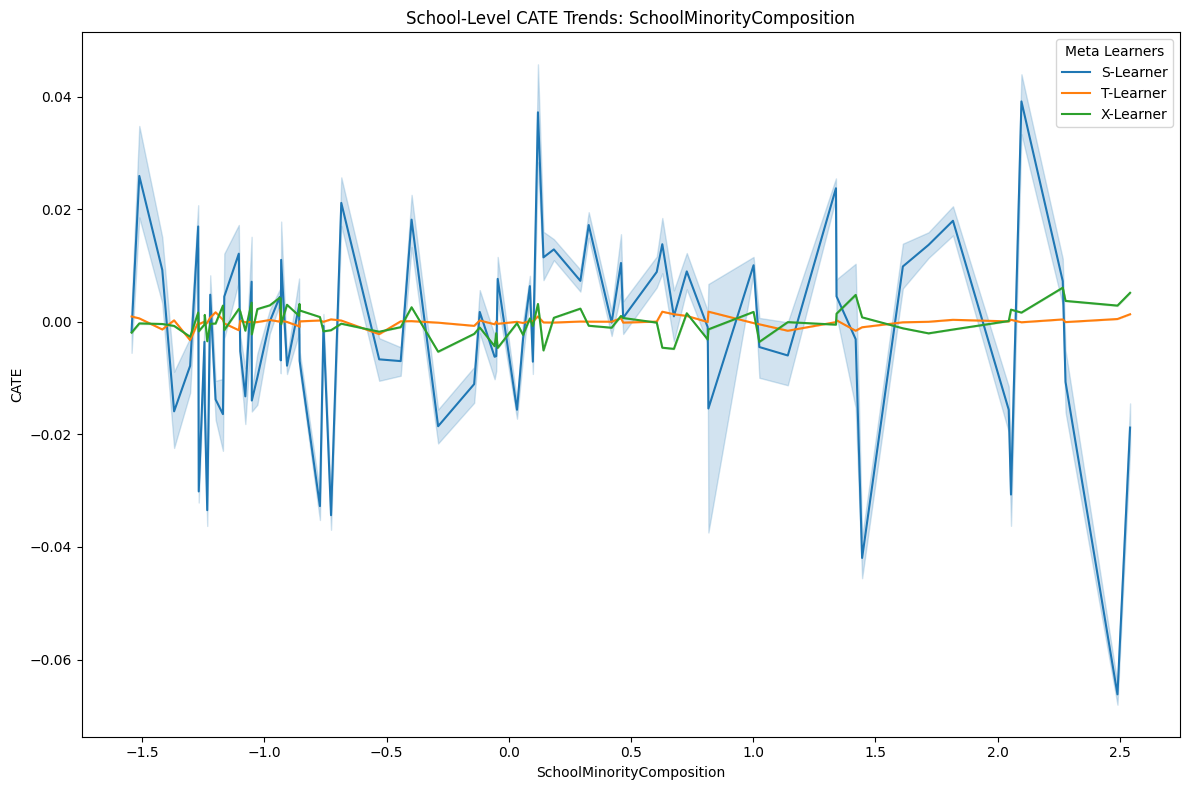

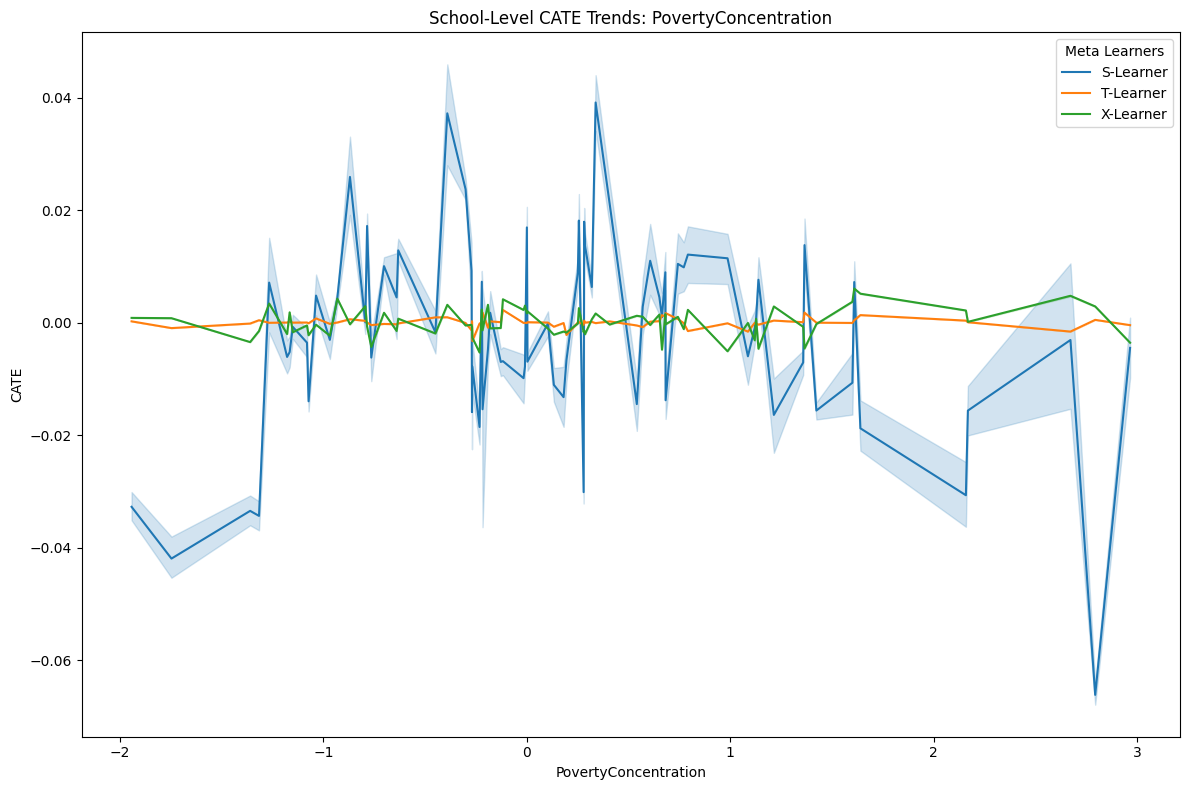

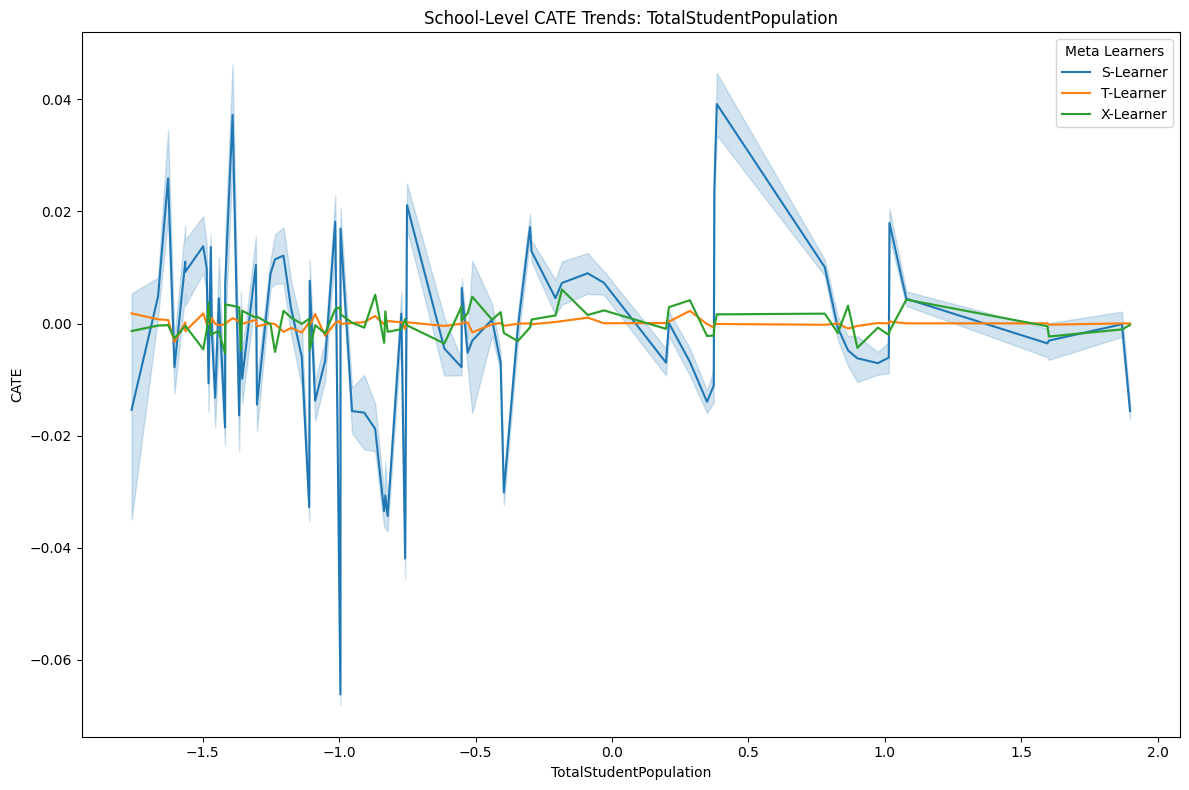

C:\Users\dell\AppData\Local\Temp\ipykernel_600\1666983368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_melted, x=category_col, y="CATE", hue="MetaLearner", ci=None)


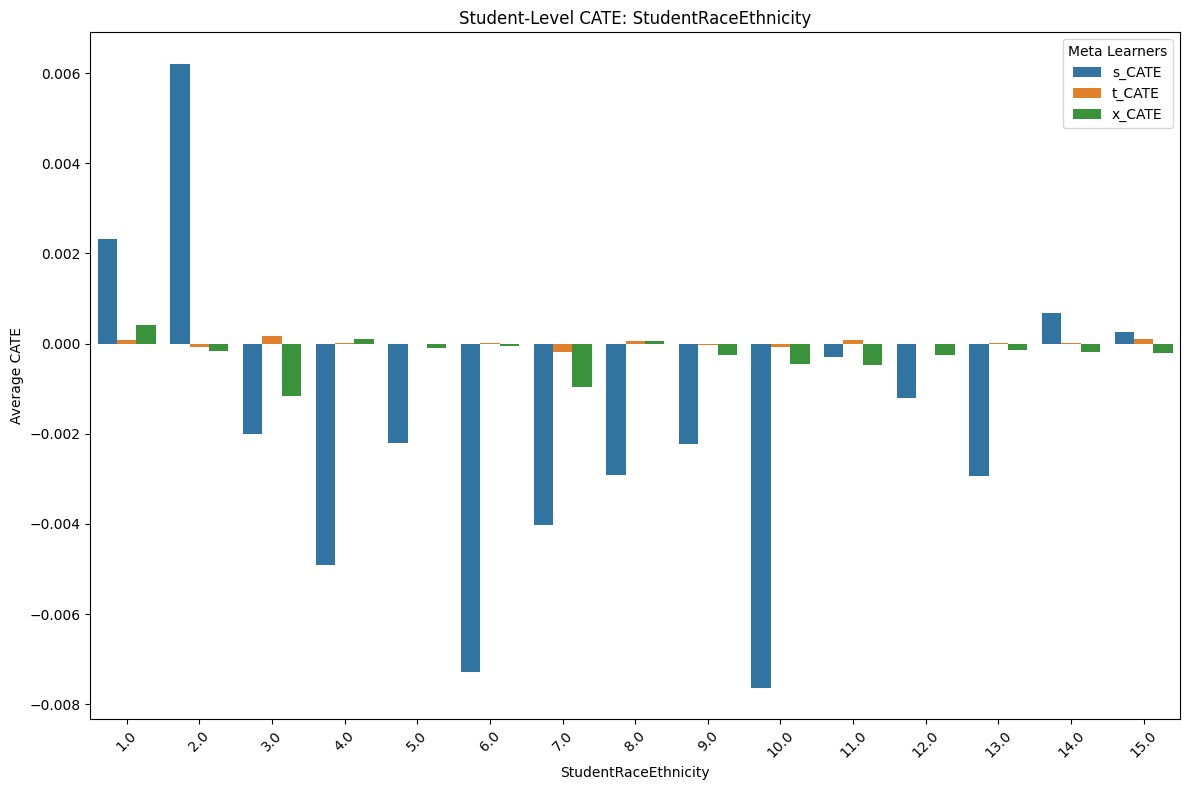

C:\Users\dell\AppData\Local\Temp\ipykernel_600\1666983368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_melted, x=category_col, y="CATE", hue="MetaLearner", ci=None)


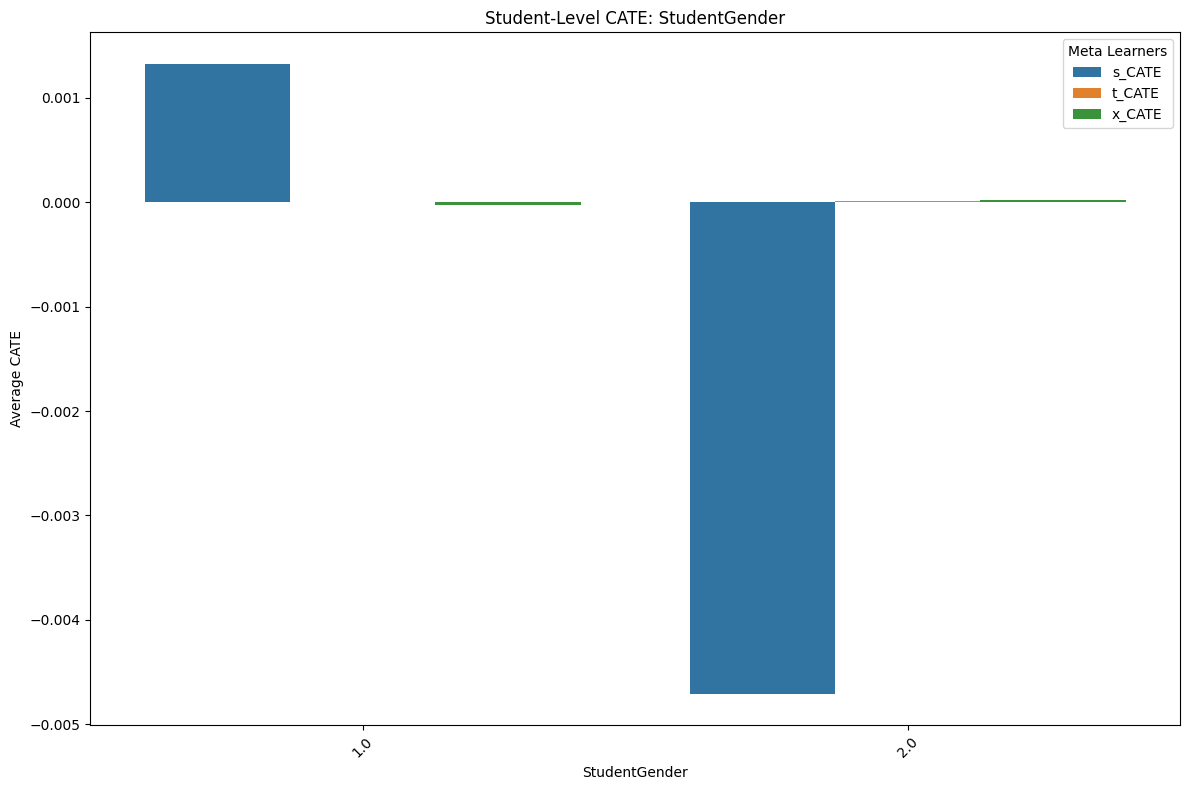

C:\Users\dell\AppData\Local\Temp\ipykernel_600\1666983368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_melted, x=category_col, y="CATE", hue="MetaLearner", ci=None)


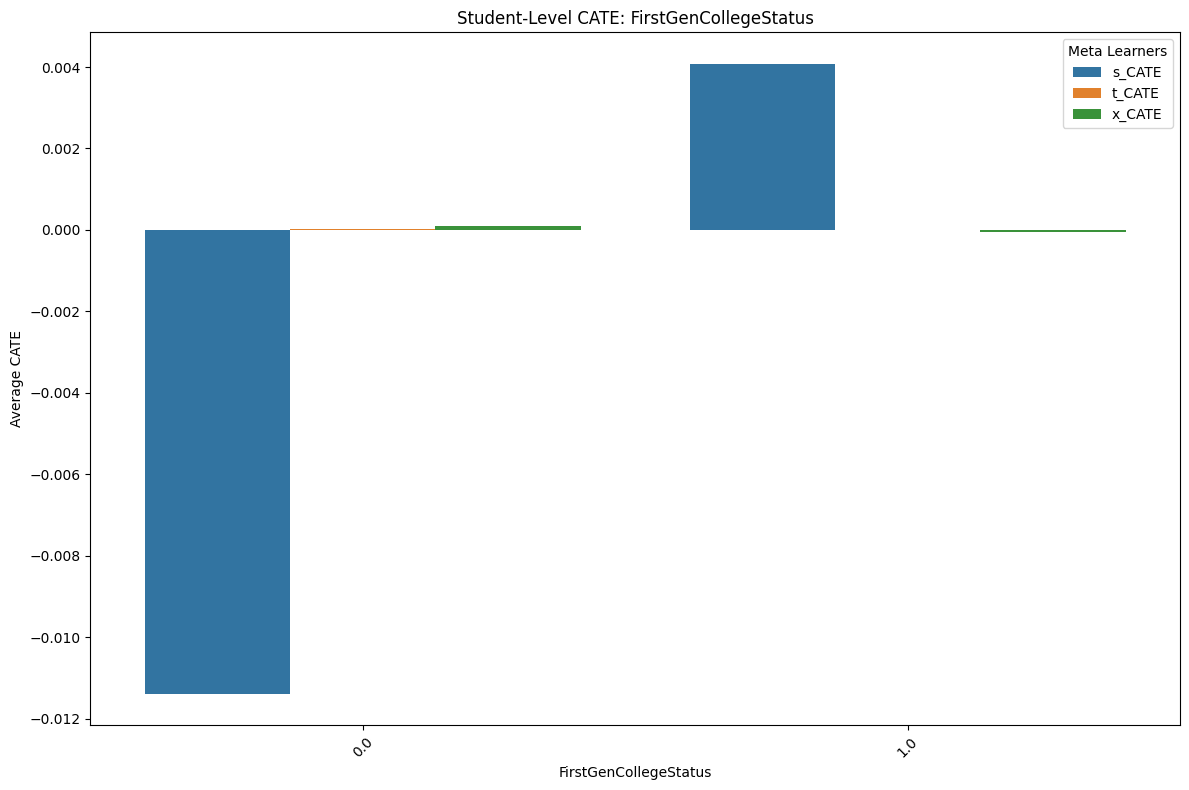

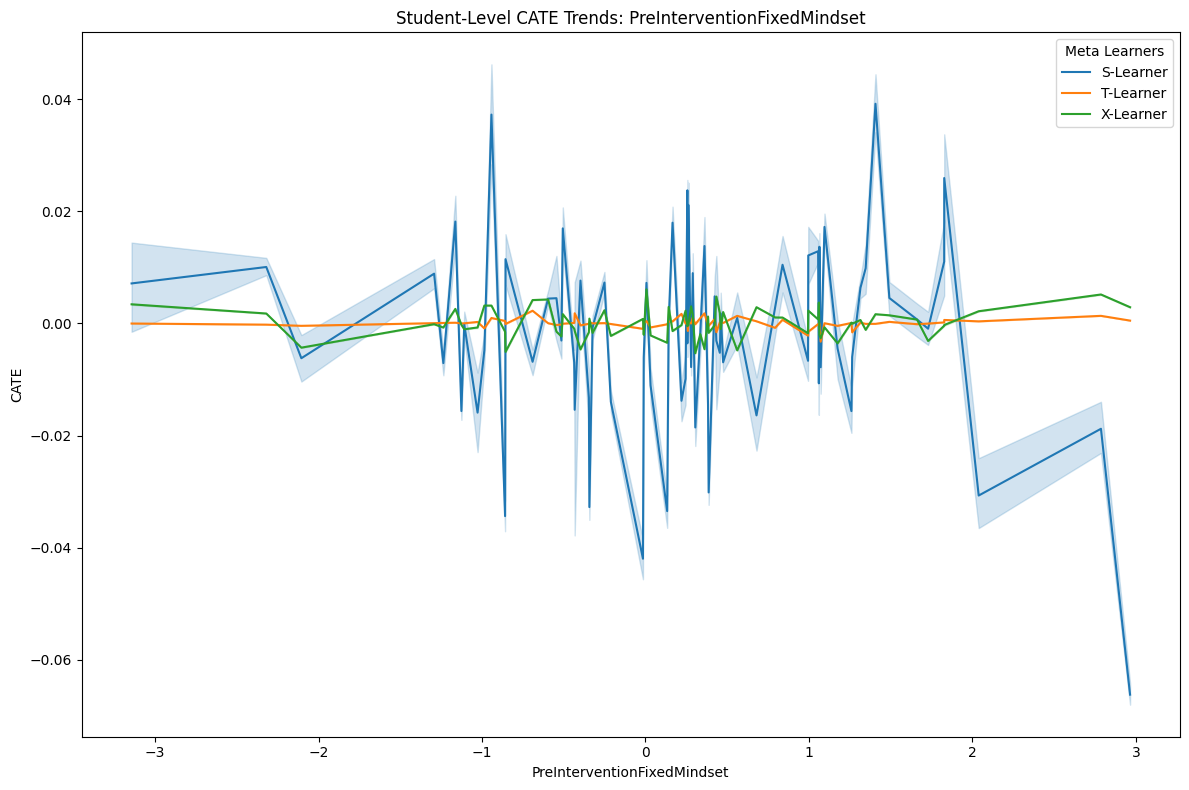

In [34]:
# School-Level Variables (Categorical and Continuous)
school_categorical_vars = ['SchoolUrbanicity']
school_continuous_vars = ['SchoolAchievementLevel', 'SchoolMinorityComposition', 'PovertyConcentration', 'TotalStudentPopulation']

# Visualize school-level variables
for category_col in school_categorical_vars:
    visualize_cate_by_category(combined_data, cate_columns, category_col, meta_learners, title_prefix="School-Level CATE")

for continuous_col in school_continuous_vars:
    visualize_cate_by_continuous(combined_data, cate_columns, continuous_col, meta_learners, title_prefix="School-Level CATE Trends")

# Student-Level Variables (Categorical and Continuous)
student_categorical_vars = ['StudentRaceEthnicity', 'StudentGender', 'FirstGenCollegeStatus']
student_continuous_vars = ['PreInterventionFixedMindset']

# Visualize student-level variables
for category_col in student_categorical_vars:
    visualize_cate_by_category(combined_data, cate_columns, category_col, meta_learners, title_prefix="Student-Level CATE")

for continuous_col in student_continuous_vars:
    visualize_cate_by_continuous(combined_data, cate_columns, continuous_col, meta_learners, title_prefix="Student-Level CATE Trends")

C:\Users\dell\AppData\Local\Temp\ipykernel_600\789098516.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


ValueError: 'x' and 'y' must have the same size

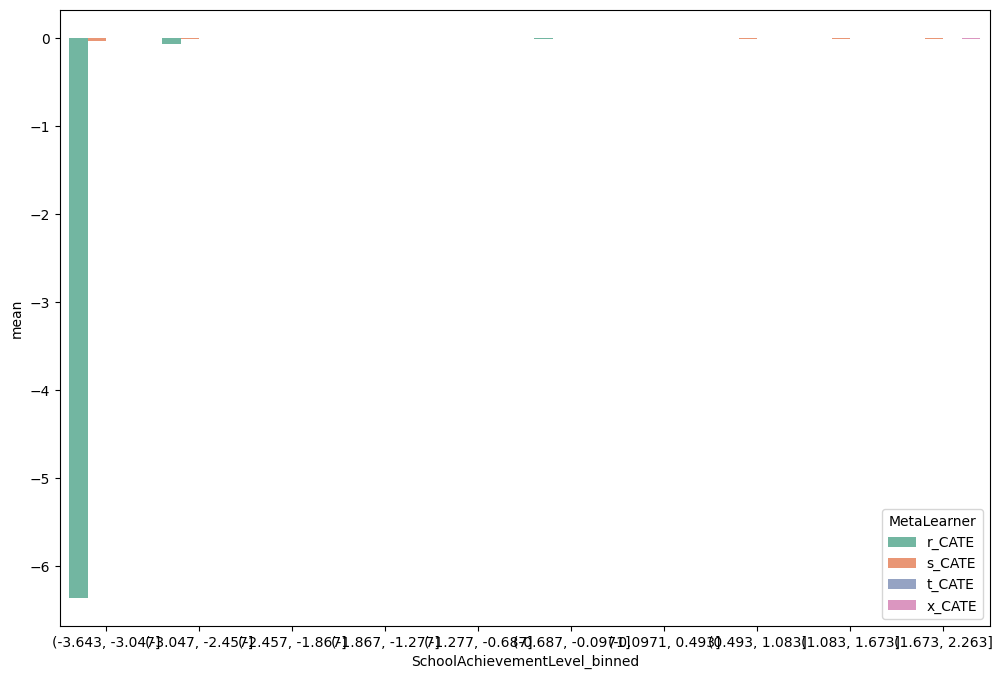

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to bin continuous variables and plot
def visualize_binned_treatment_effect(data, cate_columns, continuous_col, bins=10, meta_learners=None, title_prefix="Binned CATE by Continuous Variable"):
    plt.figure(figsize=(12, 8))
    
    # Create bins for the continuous variable
    data[f"{continuous_col}_binned"] = pd.cut(data[continuous_col], bins=bins)
    
    # Melt the data for subgroup comparison
    binned_data = pd.melt(data, id_vars=[f"{continuous_col}_binned"], value_vars=cate_columns, var_name="MetaLearner", value_name="CATE")
    
    # Aggregate CATE values by bins
    binned_summary = binned_data.groupby([f"{continuous_col}_binned", "MetaLearner"])["CATE"].agg(['mean', 'std']).reset_index()
    
    # Plot barplot with error bars
    sns.barplot(
        data=binned_summary,
        x=f"{continuous_col}_binned",
        y="mean",
        hue="MetaLearner",
        ci=None,
        palette="Set2"
    )
    plt.errorbar(
        x=np.arange(len(binned_summary[f"{continuous_col}_binned"].unique())),
        y=binned_summary['mean'],
        yerr=binned_summary['std'],
        fmt='none',
        c='black',
        capsize=5,
    )
    plt.title(f"{title_prefix}: {continuous_col}")
    plt.xticks(rotation=45)
    plt.xlabel(f"Binned {continuous_col}")
    plt.ylabel("CATE (Mean ± Std)")
    plt.legend(title="Meta Learners")
    plt.tight_layout()
    plt.show()

# Specify CATE columns and corresponding meta-learners
cate_columns = ["s_CATE", "t_CATE", "x_CATE", "r_CATE"]
meta_learners = ["S-Learner", "T-Learner", "X-Learner", "R-Learner"]


# Continuous school-level variables to visualize
continuous_vars = ['SchoolAchievementLevel', 'SchoolMinorityComposition', 'PovertyConcentration', 'TotalStudentPopulation']

# Plot binned CATE for continuous variables
for continuous_col in continuous_vars:
    visualize_binned_treatment_effect(combined_data, cate_columns, continuous_col, bins=10, meta_learners=meta_learners, title_prefix="Binned CATE Trends")
